In [1]:
%pylab inline

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


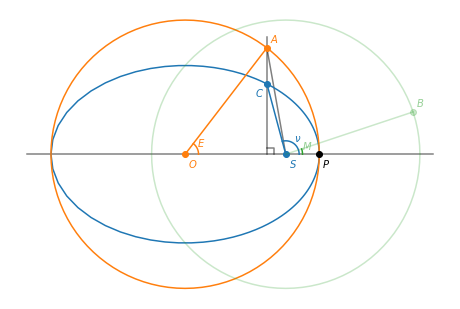

In [2]:
nus           = np.linspace(0, 2*np.pi, 101)
semimajoraxis = 1
eccentricity  = .75
ae = semimajoraxis * eccentricity

fig = plt.figure(figsize=(8,6))
ax = plt.subplot2grid((1,1), (0,0))
_ = ax.set_aspect("equal")
_ = ax.axis('off')

def rho(nu):
    p = semimajoraxis * (1-eccentricity**2)
    return p / (1+eccentricity*np.cos(nu))

nu = 7 * np.pi / 12
x_C, y_C = rho(nu)*np.cos(nu), rho(nu)*np.sin(nu)
E = 2 * np.arctan(np.sqrt((1-eccentricity)/(1+eccentricity)) * np.tan(nu/2))
x_A, y_A = semimajoraxis*np.cos(E) - ae, semimajoraxis*np.sin(E)
M = E - eccentricity*np.sin(E)
x_B, y_B = semimajoraxis*np.cos(M), semimajoraxis*np.sin(M)
x_P, y_P = semimajoraxis - ae, 0

# horizontal axis
_= ax.plot(np.array([-ae-semimajoraxis, semimajoraxis])*1.1, [0,0], "-k", alpha=.5)

_= ax.plot([x_C, x_C], [0, 1.1*y_A], "-k", alpha=.5)
_= ax.plot([x_C, x_C+.05, x_C+.05], [.05, .05, 0], "-k", alpha=.5)

_= ax.plot([0, x_A], [0, y_A], "-k", alpha=.5)

# True anomaly, Orbit
_ = ax.plot(rho(nus)*np.cos(nus), rho(nus)*np.sin(nus), "C0")
_ = ax.plot([0],[0], "oC0")
_ = ax.annotate(r"$S$", (0,0), color="C0", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
_ = ax.plot([x_C], [y_C], "o", color="C0")
_ = ax.annotate(r"$C$", (x_C, y_C), color="C0", textcoords="offset points", xytext=(-3,-3),
                horizontalalignment='right', verticalalignment='top', alpha=1)
_ = ax.plot([0, x_C], [0, y_C], "C0")
_ = ax.plot(.1*np.cos(np.linspace(0,nu)), .1*np.sin(np.linspace(0,nu)), "C0")
_ = ax.annotate(r"$\nu$", (.1*np.cos(nu/2), .1*np.sin(nu/2)), color="C0",
                horizontalalignment='left', verticalalignment='bottom', alpha=1)

# Eccentric anomaly, Auxiliary circle
_ = ax.plot(semimajoraxis*np.cos(nus) - ae, semimajoraxis*np.sin(nus), "C1", alpha=1)
_ = ax.plot([-ae], [0], "o", color="C1")
_ = ax.annotate(r"$O$", (-ae,0), color="C1", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
_ = ax.plot([x_A],[y_A], "o", color="C1")
_ = ax.annotate(r"$A$", (x_A, y_A), color="C1", textcoords="offset points", xytext=(3,3),
                horizontalalignment='left', verticalalignment='bottom', alpha=1)
_ = ax.plot([-ae, x_A], [0, y_A], "C1")
_ = ax.plot(.1*np.cos(np.linspace(0,E))-ae, .1*np.sin(np.linspace(0,E)), "C1")
_ = ax.annotate(r"$E$", (.1*np.cos(E/2)-ae, .1*np.sin(E/2)), color="C1",
                horizontalalignment='left', verticalalignment='bottom', alpha=1)

# Mean anomaly
_ = ax.plot(semimajoraxis*np.cos(nus), semimajoraxis*np.sin(nus), "C2", alpha=.25)
_ = ax.plot([x_B], [y_B], "oC2", alpha=.25)
_ = ax.annotate(r"$B$", (x_B, y_B), color="C2", textcoords="offset points", xytext=(3,3),
                horizontalalignment='left', verticalalignment='bottom', alpha=.5)
_ = ax.plot([0, x_B], [0, y_B], "C2", alpha=.25)
_ = ax.plot(.125*np.cos(np.linspace(0,M)), .125*np.sin(np.linspace(0,M)), "C2")
_ = ax.annotate(r"$M$", (.125*np.cos(M/2), .125*np.sin(M/2)), color="C2",
                horizontalalignment='left', verticalalignment='bottom', alpha=.5)

_ = ax.plot([x_P], [y_P], "ok")
_ = ax.annotate(r"$P$", (x_P, y_P), color="k", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)


#mysavefig("kepler_equation.png")